In [8]:
from PIL import Image
import requests
from io import BytesIO

saskey = "sv=2021-06-08&ss=bfqt&srt=co&sp=rltfx&se=2022-07-30T03:07:34Z&st=2022-07-15T19:07:34Z&spr=https&sig=SgGQgoKGwnGSvZR%2BZviXoRB0wiKtiFlG6W8vsLhHlIU%3D"

url = "https://devstraicscussynth.blob.core.windows.net/80001641-c51b-4aa3-ac16-91031d1d58c6/6/6/9.jpg?"+saskey


im = Image.open(requests.get(url, stream=True).raw)


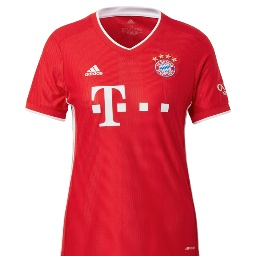

In [9]:
im